In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
from mechanize import Browser

out_path = '/home/jsignell/erddapData/MaricopaCounty/'
tr = [y+'-01-01' for y in [str(y) for y in range(1980, 2017)]]
tr.append(str(pd.datetime.utcnow().date()))

meta = pd.read_csv("/home/jsignell/Desktop/ALERT_sensors_all_by_id.csv")
meta['DEV_ID'] = meta['DEV_ID'].astype(int).astype(str)

In [7]:
types = meta.DEV_TYPE.unique()
types

array(['Rptr. Batt.', 'Precip.', 'Stream PT', 'Non Subm PT', 'Dewpoint',
       'Humidity', 'Temperature', 'Bubbler', 'Peak Wind', 'Wind Spd/Dir',
       'Wind Dir.', 'Solar Rad.', 'Pressure', 'Status', 'Flasher',
       'Ave. Wind', 'Radar', 'Water Temp.'], dtype=object)

In [40]:
ds = xr.open_dataset('/home/jsignell/erddapData/MaricopaCounty/5382.nc')

In [42]:
ds.Temperature.min()

<xarray.DataArray 'Temperature' ()>
array(-757933600.0)
Coordinates:
    lat      float64 34.41
    lon      float64 -112.4
    elev     float64 7.495e+03

In [68]:
id1s = [f[0:-3] for f in os.listdir('/home/jsignell/erddapData/MaricopaCounty/')]
meta.iloc[[s for s in meta.index if meta.loc[s, 'DEV_ID'] not in id1s],:]

,DEV_ID,DEV_NAME,DEV_TYPE,DEV_DATE,STA_LAT_DMS,STA_LONG_DMS,STA_ELEV,STA_LOC
0,358,Mt. Union Repeater,Rptr. Batt.,4/28/1992 0:00:00,34 24 54.3,112 24 16.9,7980.0,"Top of Mt. Union, 10 mi. SSE of Prescott"
1,754,Sacaton Peak,Rptr. Batt.,6/11/1996 0:00:00,33 00 09.5,111 40 26.8,2720.0,4.5 miles E. of the SR387 / I-10 junction
81,4674,Pima Rd. @ Jomax Rd.,Pressure,6/26/1997 0:00:00,33 43 42.3,111 53 35.7,2180.0,1/8 mi. NW of Pima Rd. and Jomax Rd.
99,4704,Durango Complex,Pressure,11/4/1991 0:00:00,33 25 35.9,112 07 07.0,1050.0,27th Ave. and Durango St.
113,4757,Salt/67th Flow,Status,7/14/2008 0:00:00,33 23 51.8,112 12 12.6,975.0,Salt River at 67th Avenue
119,4769,City of Glendale,Pressure,11/22/2010 0:00:00,33 32 37.1,112 11 36.8,1150.0,Grand Avenue at 63rd Avenue
138,4798,Phoenix Dam 2B,Pressure,6/29/2009 0:00:00,33 36 13.2,112 03 52.7,1380.0,Near Thunderbird and 7th St.
142,4807,ACDC @ Dreamy Draw,Status,11/4/2009 0:00:00,33 32 50.6,112 03 28.5,1235.0,Arizona Canal near Northern Ave.
145,4812,ACDC @ 16th St.,Status,11/4/2009 0:00:00,33 32 31.5,112 02 54.5,1240.0,ACDC @ 16th St.
174,4879,Desert Mtn. School,Pressure,7/19/2006 0:00:00,33 48 33.6,112 04 37.8,1810.0,1/4 mile SE of Cloud Rd. and 7th Ave.


In [67]:
id1s = [f[0:-3] for f in os.listdir('/home/jsignell/erddapData/MaricopaCounty/')]
[meta.loc[s, 'DEV_ID'] for s in meta[meta['DEV_TYPE']=='Status'].index if meta.loc[s, 'DEV_ID'] not in id1s]

['4757', '4807', '4812', '5094', '5107', '5457', '5872']

In [60]:
max_wind = meta[meta['DEV_TYPE']=='Peak Wind'].index

In [61]:
out_path = '/home/jsignell/MaricopaCounty/'
for j in max_wind: 
    name = meta.loc[j, 'DEV_TYPE']
    id1 = meta.loc[j, 'DEV_ID']

    ds = xr.open_dataset('/home/jsignell/erddapData/MaricopaCounty/'+id1+'.nc')
    ds[ds.data_vars.keys()[0]].attrs.update({'standard_name': 'max_wind_speed'})
    if ds.dims.values()[0] < 20:
        chunk=1
    else:
        chunk = ds.dims.values()[0]/20
    for v in ds.data_vars.keys():
        ds[v].encoding.update({'dtype': np.double,'chunksizes':(chunk,),'zlib': True})
    ds.lat.attrs.update({'units': 'degrees_north',
                         'axis': 'Y',
                         'long_name': 'latitude',
                         'standard_name': 'latitude'})
    ds.lat.encoding.update({'dtype': np.double,'chunksizes':(chunk,),'zlib': True})
    ds.lon.attrs.update({'units': 'degrees_east',
                         'axis': 'X',
                         'long_name': 'longitude',
                         'standard_name': 'longitude'})
    ds.lon.encoding.update({'dtype': np.double,'chunksizes':(chunk,),'zlib': True})

    ds.elev.attrs.update({'units': 'feet',
                         'axis': 'Z',
                         'long_name': 'elevation',
                         'standard_name': 'elevation'})
    ds.elev.encoding.update({'dtype': np.double,'chunksizes':(chunk,),'zlib': True})
    ds.time.encoding.update({'units':'seconds since 1970-01-01', 
                             'calendar':'gregorian',
                             'dtype': np.double,'chunksizes':(chunk,),'zlib': True})
    ds.to_netcdf('{out_path}{id1}.nc'.format(out_path=out_path, id1=meta.loc[j, 'DEV_ID']), format='netCDF4', engine='netcdf4')
    ds.close()
    print id1

4609
4664
4694
4774
4784
4869
4924
5044
5134
5259
5274
5433
5646
5654
5694
5866
5884
5904
5934
6504
6554
6584
6614
6644
6709
6774
6883
6904
6964
7114


In [8]:
types = meta.DEV_TYPE.unique()
types

array(['Rptr. Batt.', 'Precip.', 'Stream PT', 'Non Subm PT', 'Dewpoint',
       'Humidity', 'Temperature', 'Bubbler', 'Peak Wind', 'Wind Spd/Dir',
       'Wind Dir.', 'Solar Rad.', 'Pressure', 'Status', 'Flasher',
       'Ave. Wind', 'Radar', 'Water Temp.'], dtype=object)

In [22]:
def fill_form(id1, start, end):
    br = Browser()
    br.open("http://alert.fcd.maricopa.gov/showrpts_mc.html")

    for i, f in enumerate(br.forms()):
        if i==0:
            continue
        else:
            br.form =f

    br.form.set_value(id1, name="ID1", type="text")  

    #set start time and date
    br.form.set_value([start[5:7]], name="ms")
    br.form.set_value([start[8:10]], name="ds")
    br.form.set_value([start[0:4]], name="ys")
    br.form.set_value(["00:00:00"], name="hs")

    #set end time and date
    br.form.set_value([end[5:7]], name="ME")
    br.form.set_value([end[8:10]], name="DE")
    br.form.set_value([end[0:4]], name="YE")
    br.form.set_value(["24:00:00"], name="HE")
    response = br.submit()  # submit current form
    L = [l for l in response.readlines()]
    return(L)

def get_data(L):
    s = pd.DataFrame([l.split() for l in L[14:-2]])
    cols = [l.strip() for l in L[13].split('  ') if l.strip()]
    cols.extend(range(s.shape[1]-len(cols)))
    s.columns = cols
    
    # data are in mountain time with no daylight savings so convert to UTC
    dt_index = pd.DatetimeIndex(s['Date']+' '+s['Time'])+pd.DateOffset(hours=7)
    s = s.set_index(dt_index).drop(['Date','Time'], axis=1)
    s.index.name='time'
    
    # change the name of the data variable from units to the actual name
    name = L[7].strip()
    units = s.columns
    s.columns = [name]*len(s.columns)
    
    # convert to float
    s = s.astype('float')
    s = s.sort_index()
    return(units, s)
    
def to_decimal(degree, minute, second):
    return(degree+(minute/60.)+(second/3600.))

def to_ds(s, lat, lon, elev, units, name):
    ds = s.to_xarray()
    ds['lat'] = lat
    ds['lon'] = lon
    ds['elev'] = elev
    ds.set_coords(['time','lat','lon', 'elev'], inplace=True)
    if s.shape[0] < 20:
        chunk=1
    else:
        chunk = s.shape[0]/20
    
    if name == 'Precip.':
        attrs = {'standard_name': 'rainfall'}
    elif name == 'Temperature':
        attrs = {'standard_name': 'temperature'}
    elif name == 'Dewpoint':
        attrs = {'standard_name': 'dewpoint'}

    if units == 'degrees F':
        attrs.update({'units': 'degF'})
    elif units == 'inches':
        attrs.update({'units': 'inch'})
        
    for v in ds.data_vars.keys():
        ds[v].attrs.update(attrs)
        ds[v].encoding.update({'dtype': np.double,'chunksizes':(chunk,),'zlib': True})
    ds.lat.attrs.update({'units': 'degrees_north',
                         'axis': 'Y',
                         'long_name': 'latitude',
                         'standard_name': 'latitude'})
    ds.lat.encoding.update({'dtype': np.double,'chunksizes':(chunk,),'zlib': True})
    ds.lon.attrs.update({'units': 'degrees_east',
                         'axis': 'X',
                         'long_name': 'longitude',
                         'standard_name': 'longitude'})
    ds.lon.encoding.update({'dtype': np.double,'chunksizes':(chunk,),'zlib': True})

    ds.elev.attrs.update({'units': 'feet',
                         'axis': 'Z',
                         'long_name': 'elevation',
                         'standard_name': 'elevation'})
    ds.elev.encoding.update({'dtype': np.double,'chunksizes':(chunk,),'zlib': True})
    ds.time.encoding.update({'units':'seconds since 1970-01-01', 
                             'calendar':'gregorian',
                             'dtype': np.double,'chunksizes':(chunk,),'zlib': True})

    ds.attrs.update({ 'institution': 'Data from Flood Control District of Maricopa County, hosted by Princeton University',
                      'references': 'http://alert.fcd.maricopa.gov/showrpts_mc.html',
                      'featureType': 'timeSeries',
                      'Conventions': 'CF-1.6',
                      'history': 'Created by Princeton University Hydrometeorology Group at {now} '.format(now=pd.datetime.now()),
                      'author': 'jsignell@princeton.edu'})
    return(ds)

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
s.index+pd.DateOffset(hours=7)

DatetimeIndex(['2004-09-10 07:10:06', '2004-09-10 07:25:06',
               '2004-09-10 07:40:06', '2004-09-10 07:55:06',
               '2004-09-10 08:10:06', '2004-09-10 08:25:06',
               '2004-09-10 08:40:06', '2004-09-10 08:55:06',
               '2004-09-10 09:10:06', '2004-09-10 09:25:06',
               ...
               '2009-10-29 20:15:22', '2009-10-29 20:30:22',
               '2009-10-29 20:45:22', '2009-10-29 21:00:22',
               '2009-10-29 21:15:22', '2009-10-29 21:30:22',
               '2009-10-29 21:45:22', '2009-10-29 22:00:22',
               '2009-10-29 22:15:22', '2009-10-29 22:30:22'],
              dtype='datetime64[ns]', name=u'time', length=165655, freq=None)

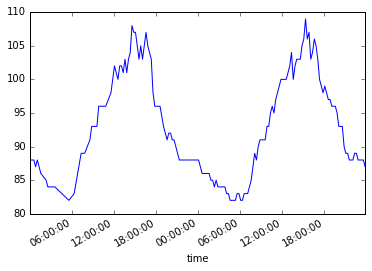

In [73]:
s['2006-08-30':'2006-08-31'].Temperature.astype('float').plot()